## Model 2
- PLUTO & ACS data

In [43]:
import pandas as pd
import os
import geopandas as gp
import fiona
import numpy as np
from choropleth import choroplethNYC as cp
import matplotlib.pylab as plt
import pylab as pl

In [2]:
os.getcwd()

'/Users/christine_biddlecombe/CJA/patrol_allocation'

In [3]:
files = os.listdir()

In [4]:
files = [file for file in files if file[-3:]=='csv']
names = [file[:-4] for file in files]

In [5]:
frames = []
for file, name in zip(files, names):
    name = pd.read_csv(file)
    frames.append(name)

In [6]:
files

['age_precinct.csv',
 '2016_estimations.csv',
 'StopFrisk_10thru18R.csv',
 'complaint_data.csv',
 'tract_precinct_key.csv',
 'pluto.csv',
 'precinct_pop_m.csv',
 'acs_other_demo_data.csv',
 'seven_majors.csv',
 'plutocounts.csv',
 'crash_data.csv',
 'precinct_population_dayadjust.csv',
 'vacancy_only.csv',
 'plutoSums.csv']

In [7]:
acs = frames[7] #refers to acs_other_demo_data.csv

In [8]:
acs.head()

,Unnamed: 0,precinct,lim_eng_other_lang_tot,total_spanish_speaking,born_outside_us,tot_w_race,white,black,am_indian_alask_native,nat_hawai_pac_isl,asian,other_race,two_more_race,median_fam_income,unemployment_rate,lim_eng_other_perc,fam_below_pov_line
0,0,1.0,27,2853,1515,73428,55177,1909,80,10,12286,1075,2891,202088.076923,3.130769,12.460000,-888888888.0
1,1,5.0,8,4920,1643,57974,16413,3866,303,5,33602,2020,1765,83063.454545,6.527273,4.075000,-888888888.0
2,2,6.0,0,2575,1197,62780,53498,1334,84,4,5406,612,1842,203360.416667,3.858333,0.000000,-888888888.0
3,3,7.0,31,13115,4469,48995,17621,4467,274,0,15084,9559,1990,60776.700000,7.340000,22.216667,-888888888.0
4,4,9.0,0,12314,4622,67694,41403,6130,133,65,9169,8593,2201,102720.785714,5.928571,0.000000,-888888888.0


In [9]:
acs.drop(['Unnamed: 0', 'lim_eng_other_lang_tot', 'tot_w_race',
           'black', 'am_indian_alask_native', 
           'nat_hawai_pac_isl', 'asian',
           'other_race', 'two_more_race',
           'lim_eng_other_perc', 'fam_below_pov_line'], 
         axis=1, inplace=True)

In [10]:
acs.head()

,precinct,total_spanish_speaking,born_outside_us,white,median_fam_income,unemployment_rate
0,1.0,2853,1515,55177,202088.076923,3.130769
1,5.0,4920,1643,16413,83063.454545,6.527273
2,6.0,2575,1197,53498,203360.416667,3.858333
3,7.0,13115,4469,17621,60776.700000,7.340000
4,9.0,12314,4622,41403,102720.785714,5.928571


In [11]:
pluto = frames[12]
pluto.head()

,Unnamed: 0,precinct,total,UnitsTotal,total_vacant_pct
0,0,1.0,592,60567,0.977430
1,1,5.0,500,29370,1.702417
2,2,6.0,2479,47287,5.242456
3,3,7.0,207,31892,0.649066
4,4,9.0,1271,45741,2.778689


In [12]:
pluto.drop(['Unnamed: 0', 'total'], 
        axis=1, inplace=True)

## merging dfs and adding population

In [13]:
## merge the dataframes
acsPluto = pd.merge(pluto, acs, left_on='precinct',
                  right_on='precinct')

In [14]:
acsPluto.head()

,precinct,UnitsTotal,total_vacant_pct,total_spanish_speaking,born_outside_us,white,median_fam_income,unemployment_rate
0,1.0,60567,0.977430,2853,1515,55177,202088.076923,3.130769
1,5.0,29370,1.702417,4920,1643,16413,83063.454545,6.527273
2,6.0,47287,5.242456,2575,1197,53498,203360.416667,3.858333
3,7.0,31892,0.649066,13115,4469,17621,60776.700000,7.340000
4,9.0,45741,2.778689,12314,4622,41403,102720.785714,5.928571


## Adding in population and merging with crime df

In [15]:
pop = frames[6]
pop2 = pop[['precinct_me', 'total_pop2017']]
pop2.head()

,precinct_me,total_pop2017
0,1.0,75871
1,5.0,50839
2,6.0,59687
3,7.0,59018
4,9.0,75718


In [16]:
acsF= pd.merge(acsPluto, pop2, left_on='precinct',
                  right_on='precinct_me')

In [17]:
acsF.drop(['precinct_me'], axis=1, inplace=True)

In [18]:
acsF.head()

,precinct,UnitsTotal,total_vacant_pct,total_spanish_speaking,born_outside_us,white,median_fam_income,unemployment_rate,total_pop2017
0,1.0,60567,0.977430,2853,1515,55177,202088.076923,3.130769,75871
1,5.0,29370,1.702417,4920,1643,16413,83063.454545,6.527273,50839
2,6.0,47287,5.242456,2575,1197,53498,203360.416667,3.858333,59687
3,7.0,31892,0.649066,13115,4469,17621,60776.700000,7.340000,59018
4,9.0,45741,2.778689,12314,4622,41403,102720.785714,5.928571,75718


In [19]:
acsF.shape

(73, 9)

In [20]:
p14 = acsF[acsF.precinct == 14]
p14.head()

,precinct,UnitsTotal,total_vacant_pct,total_spanish_speaking,born_outside_us,white,median_fam_income,unemployment_rate,total_pop2017
7,14.0,45242,1.136112,1166,333,8674,184745.142857,3.785714,12716


## Creating Rates, Creating Column that represents sums of all rates

In [21]:
acsF['tot_units_pct'] = acsF.UnitsTotal / acsF.total_pop2017
acsF['spanish_spking_pct'] = acsF.total_spanish_speaking / acsF.total_pop2017
acsF['not_usborn_pct'] = acsF.born_outside_us / acsF.total_pop2017
acsF['non_white_pct'] = 1 - (acsF.white / acsF.total_pop2017)
#acsF['income_pp'] = acsF.median_fam_income / acsF.total_pop2017
acsF['total_vacant_pct'] = acsF['total_vacant_pct'] / 100
acsF['unemployment_rate'] = acsF['unemployment_rate'] / 100

In [22]:
acsF.head()

,precinct,UnitsTotal,total_vacant_pct,total_spanish_speaking,born_outside_us,white,median_fam_income,unemployment_rate,total_pop2017,tot_units_pct,spanish_spking_pct,not_usborn_pct,non_white_pct
0,1.0,60567,0.009774,2853,1515,55177,202088.076923,0.031308,75871,0.798289,0.037603,0.019968,0.272752
1,5.0,29370,0.017024,4920,1643,16413,83063.454545,0.065273,50839,0.577706,0.096776,0.032318,0.677157
2,6.0,47287,0.052425,2575,1197,53498,203360.416667,0.038583,59687,0.792250,0.043142,0.020055,0.103691
3,7.0,31892,0.006491,13115,4469,17621,60776.700000,0.073400,59018,0.540378,0.222220,0.075723,0.701430
4,9.0,45741,0.027787,12314,4622,41403,102720.785714,0.059286,75718,0.604097,0.162630,0.061042,0.453195


In [23]:
acsF2 = acsF[['precinct', 'total_vacant_pct',
             'unemployment_rate', 'tot_units_pct',
             'spanish_spking_pct', 'not_usborn_pct',
             'non_white_pct']]

In [24]:
# creating value for total rates of all measures rate per precinct
acsF2['all_rates']= acsF2.iloc[:,1:8].sum(axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# creating new column as a percentage of total crime in the city, based sum of total_crime column
# each value will represent the share of total crime that occurs in that precinct 
acsF2['total_share'] = (acsF2.all_rates / acsF2.all_rates.sum())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
acsF2['total_share'].sum()

0.9999999999999999

## Multiply Rates by 20000 to get patrol allocation by precinct

In [27]:
acsF2['allocation'] = acsF2.total_share * 20000

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
acsF2['allocation'] = acsF2['allocation'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
#crimeRates.rename(columns={'ADDR_PCT_CD':'precinct'}, inplace=True)

In [30]:
acsF2.describe()

,precinct,total_vacant_pct,unemployment_rate,tot_units_pct,spanish_spking_pct,not_usborn_pct,non_white_pct,all_rates,total_share,allocation
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,64.383562,0.040164,0.075804,0.508589,0.223017,0.038730,0.565949,1.452253,0.013699,273.547945
std,36.007958,0.019787,0.028254,0.394143,0.178032,0.022966,0.250786,0.452791,0.004271,85.367676
min,1.000000,0.006491,0.028226,0.283437,0.032510,0.010869,0.074849,0.557000,0.005254,105.000000
25%,34.000000,0.025817,0.056180,0.369580,0.091696,0.022055,0.366554,1.150200,0.010849,216.000000
50%,67.000000,0.038319,0.071000,0.407304,0.148770,0.032085,0.599729,1.409354,0.013294,265.000000
75%,101.000000,0.052488,0.094000,0.531471,0.314747,0.050836,0.737009,1.661484,0.015672,313.000000
max,123.000000,0.116875,0.155583,3.557880,0.709755,0.116595,0.975046,4.042848,0.038135,762.000000


In [31]:
acsOutlier = acsF2[acsF2.allocation == 762]
acsOutlier.head()

,precinct,total_vacant_pct,unemployment_rate,tot_units_pct,spanish_spking_pct,not_usborn_pct,non_white_pct,all_rates,total_share,allocation
7,14.0,0.011361,0.037857,3.55788,0.091696,0.026187,0.317867,4.042848,0.038135,762


In [32]:
# crimeRates.iloc[crimeRates['total_crime_share'].argmax()] # find column with max in total_Crime_share column, 
                                                          # print associated values 

In [33]:
# crimeRates.iloc[crimeRates['total_crime_share'].argmin()] # find column with min in total_Crime_share column, 
                                                          # print associated values 

## Merging in Shapefile to Visualize Allocations

In [34]:
url = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
precinct = gp.GeoDataFrame.from_file(url)
precinct.head(2)

,precinct,shape_area,shape_leng,geometry
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...


In [35]:
patrol = pd.merge(precinct, acsF2, 
                      left_on='precinct',
                     right_on='precinct')

In [36]:
patrol.to_crs(epsg=2263, inplace=True)

Text(0.5,1,'Allocations Based on ACS, Vacancy, Etc.')

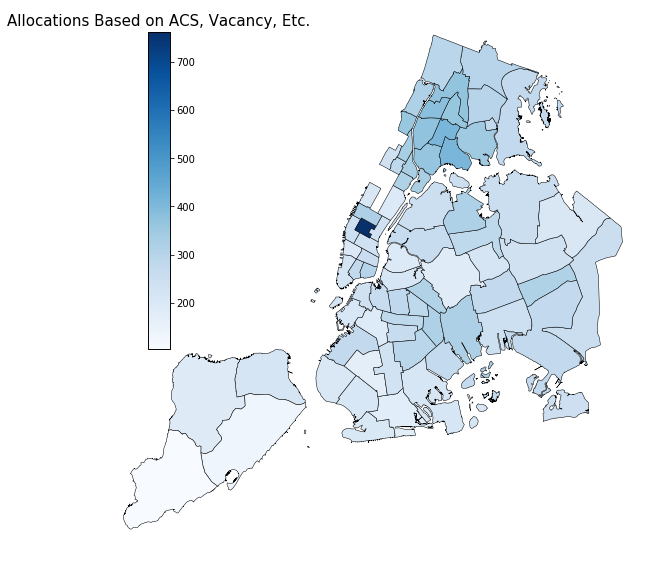

In [37]:
cp(patrol, column='allocation', cmap="Blues", edgecolor="black",lw=.5)
plt.title('Allocations Based on ACS, Vacancy, Etc.' ,fontsize=(15))

Figure 1: Obviously something weird going in with one precinct in Manhattan. Turns out it's Precinct 14 in Midtown. Likely a lot of petty crime driving up the allocation. Also missing a few precincts in the Rockaways.

In [38]:
## Removing outlier and then plotting again 

In [39]:
patrol_noOutlier = patrol[patrol.allocation != 762]

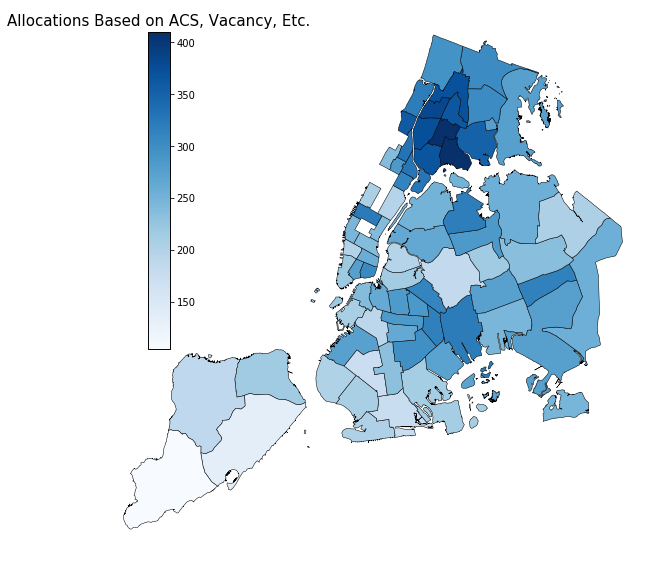

In [40]:
cp(patrol_noOutlier, column='allocation', cmap="Blues", edgecolor="black", lw=.5)
plt.title('Allocations Based on ACS, Vacancy, Etc.' ,fontsize=(15));

# Reading in 2016 Patrol Allocations

- these are best estimates

In [80]:
patrol16 = pd.read_csv('2016_estimations.csv')
patrolGeo = pd.merge(precinct, patrol16, 
                      left_on='precinct',
                     right_on='precinct')

In [81]:
patrolGeo.to_crs(epsg=2263, inplace=True)

In [82]:
# patrolGeo.total_po.replace('inf', np.nan, inplace=True)
# patrolGeo.total_po.replace(NaN, np.nan, inplace=True)

In [84]:
patrolGeo.drop([29], inplace=True)

In [87]:
patrolGeo.dropna(how='any', axis=0, inplace=True)

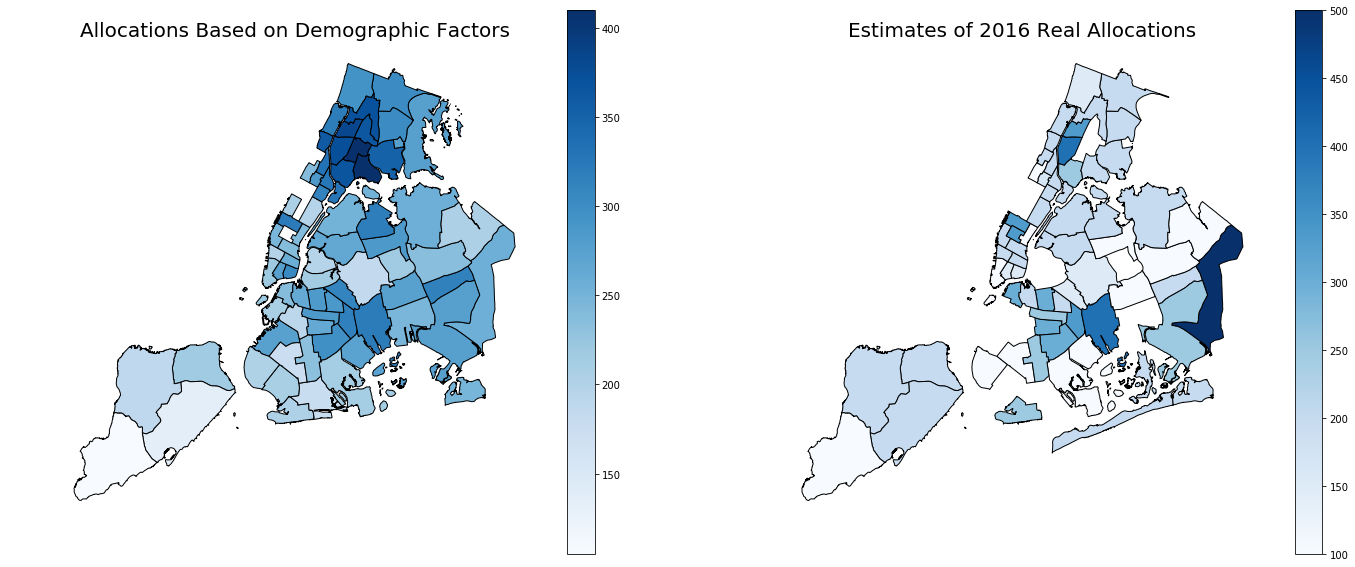

In [92]:
fig = pl.figure(figsize=(50,10))

ax1 = fig.add_subplot(141)
ax1.set_title('Allocations Based on Demographic Factors', fontsize=20)
patrol_noOutlier.plot(column='allocation', cmap='Blues',
                      ax=ax1, legend=True, edgecolor='black')
ax1.axis('off')

ax2 = fig.add_subplot(142)
ax2.set_title('Estimates of 2016 Real Allocations', fontsize=20)
patrolGeo.plot(column='total_po', cmap='Blues', 
               ax=ax2, legend=True, edgecolor='black')
ax2.axis('off');